## Alternative assignment

Here you can find an alternative assignment notebook which does not require py2 or a physical screen.

For starters, please go to __qlearning.py__ file in the current folder and implement q-learning agent by following instructions in the file.

In [1]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

### Demo on taxi

Here we use the qlearning agent from before on taxi env from openai gym.
You will need to insert a few agent functions here.

In [285]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

[2017-04-14 22:17:26,955] Making new env: Taxi-v2


In [286]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [287]:
def play_and_train(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        
        agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward
    
        
    

2.4794970926789524e-07


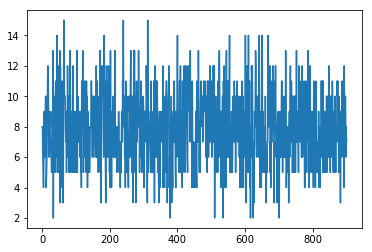

In [300]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))
    
    agent.epsilon *= 0.999
    
    if i %100 ==0:
        clear_output(True)
        print(agent.epsilon)
        plt.plot(rewards)
        plt.show()
        

# Main assignment

Use agent to train efficiently on CartPole-v0

This environment has a continuous number of states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

[2017-04-14 22:18:41,312] Making new env: CartPole-v0


first state:[-0.03273262  0.01685547 -0.04211289  0.01626316]


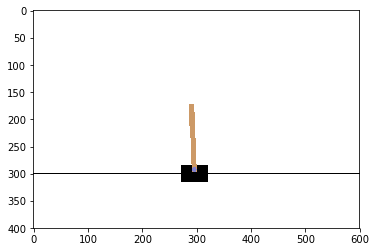

In [301]:
#run xvfb and set %env DISPLAY=:1 if in binder or on a server
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s"%(env.reset()))
plt.imshow(env.render('rgb_array'))

In [302]:
# map of state entry to count of digits to preserve
digits_count = [4, 4, 3, 3]
q_values = {}
gamma = 0.99
learning_rate = 1
episode_lengths = []

In [303]:
def state_to_key(s):
    return tuple(round(v * (10**digits), 0) for v, digits in zip(s, digits_count))

In [304]:
def action(state_key, epsilon=0.1):
    if np.random.rand() < epsilon:
        return np.random.choice(n_actions)
    best_q = None
    best_action = None
    for a in range(n_actions):
        q = q_values.get((state_key, a), 0.0)
        if best_q is None or best_q < q:
            best_q = q
            best_action = a
    return best_action

In [305]:
def value(state_key):
    best_q = None
    for a in range(n_actions):
        q = q_values.get((state_key, a), 0.0)
        if best_q is None or best_q < q:
            best_q = q
    return best_q

In [308]:
for _ in range(100):
    elen = []
    for _ in range(100):
        s = env.reset()
        episode_len = 0
        while True:
            s_key = state_to_key(s)
            a = action(s_key, epsilon=0.3)
            new_s, r, done, _ = env.step(a)
            s = new_s
            new_s_key = state_to_key(new_s)
            new_q = r + gamma * value(new_s_key)
            q = q_values.get((s_key, a), 0.0)
            q_values[(s_key, a)] = q * (1.-learning_rate) + new_q * learning_rate
            episode_len += 1
            if done:
                elen.append(episode_len)
                break
    episode_lengths.append(np.mean(elen))

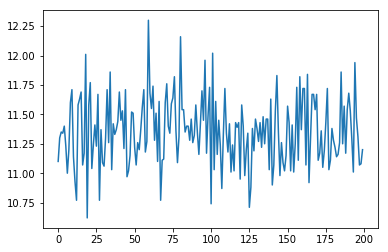

In [309]:
plt.plot(episode_lengths);